### 1. Load the dataset

In [1]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc

In [2]:
# reading the CSV file into pandas dataframe
pd_df = pd.read_csv("parkinsons.data.txt") 
pd_df.columns = pd_df.columns.str.replace(':','_')
pd_df.columns = pd_df.columns.str.replace('(','_')
pd_df.columns = pd_df.columns.str.replace(')','')
pd_df.columns = pd_df.columns.str.replace('%','pcntg')

In [3]:
pd_df.head(5).T

,0,1,2,3,4
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP_Fo_Hz,119.992,122.4,116.682,116.676,116.014
MDVP_Fhi_Hz,157.302,148.65,131.111,137.871,141.781
MDVP_Flo_Hz,74.997,113.819,111.555,111.366,110.655
MDVP_Jitter_pcntg,0.00784,0.00968,0.0105,0.00997,0.01284
MDVP_Jitter_Abs,7e-05,8e-05,9e-05,9e-05,0.00011
MDVP_RAP,0.0037,0.00465,0.00544,0.00502,0.00655
MDVP_PPQ,0.00554,0.00696,0.00781,0.00698,0.00908
Jitter_DDP,0.01109,0.01394,0.01633,0.01505,0.01966
MDVP_Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425


### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [4]:
## Data Frame columns have been normalised to ensure that its easier to read those.
pd_df.isna().sum()

name                 0
MDVP_Fo_Hz           0
MDVP_Fhi_Hz          0
MDVP_Flo_Hz          0
MDVP_Jitter_pcntg    0
MDVP_Jitter_Abs      0
MDVP_RAP             0
MDVP_PPQ             0
Jitter_DDP           0
MDVP_Shimmer         0
MDVP_Shimmer_dB      0
Shimmer_APQ3         0
Shimmer_APQ5         0
MDVP_APQ             0
Shimmer_DDA          0
NHR                  0
HNR                  0
status               0
RPDE                 0
DFA                  0
spread1              0
spread2              0
D2                   0
PPE                  0
dtype: int64

In [5]:
# Above checking of data shows that there are no null values or blank values in the dataset for individual columns

In [6]:
pd_df.shape

(195, 24)

In [7]:
# There are 195 rows and 24 attributes 

In [8]:
pd_df.dtypes

name                  object
MDVP_Fo_Hz           float64
MDVP_Fhi_Hz          float64
MDVP_Flo_Hz          float64
MDVP_Jitter_pcntg    float64
MDVP_Jitter_Abs      float64
MDVP_RAP             float64
MDVP_PPQ             float64
Jitter_DDP           float64
MDVP_Shimmer         float64
MDVP_Shimmer_dB      float64
Shimmer_APQ3         float64
Shimmer_APQ5         float64
MDVP_APQ             float64
Shimmer_DDA          float64
NHR                  float64
HNR                  float64
status                 int64
RPDE                 float64
DFA                  float64
spread1              float64
spread2              float64
D2                   float64
PPE                  float64
dtype: object

In [9]:
# Most of the columns have decimal data in it. So the dataframe is already in numerical format for modeling
# Only the Status column is integer
# Name column which is the identifier for samples in current view may not be required as it will not have any impact
# on Model results

In [10]:
# Add a variable called as name to see how many distinct patients are and their results
pd_df['col_name'] = pd_df.name.str.slice(0, 12)

In [11]:
pd_df.groupby(['status'])['col_name'].count()

status
0     48
1    147
Name: col_name, dtype: int64

In [12]:
pd_df.groupby(['col_name','status'])['col_name'].count()

col_name      status
phon_R01_S01  1         6
phon_R01_S02  1         6
phon_R01_S04  1         6
phon_R01_S05  1         6
phon_R01_S06  1         6
phon_R01_S07  0         6
phon_R01_S08  1         6
phon_R01_S10  0         6
phon_R01_S13  0         6
phon_R01_S16  1         6
phon_R01_S17  0         6
phon_R01_S18  1         6
phon_R01_S19  1         6
phon_R01_S20  1         6
phon_R01_S21  1         7
phon_R01_S22  1         6
phon_R01_S24  1         6
phon_R01_S25  1         6
phon_R01_S26  1         6
phon_R01_S27  1         7
phon_R01_S31  1         6
phon_R01_S32  1         6
phon_R01_S33  1         6
phon_R01_S34  1         6
phon_R01_S35  1         7
phon_R01_S37  1         6
phon_R01_S39  1         6
phon_R01_S42  0         6
phon_R01_S43  0         6
phon_R01_S44  1         6
phon_R01_S49  0         6
phon_R01_S50  0         6
Name: col_name, dtype: int64

In [13]:
# 048 records have the parkinsons flag as zero - diagnosed with Parkinsons
# 147 records have the parkinsons flag as one - diagnosed without Parkinsons
# All customer records have the parkinsons flag unique so the individual records 
# without customer name can be selected further for analysis

### 3. Using univariate ; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [14]:
pd_df.describe().T # Checking the distribution of data across all columns

,count,mean,std,min,25%,50%,75%,max
MDVP_Fo_Hz,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP_Fhi_Hz,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP_Flo_Hz,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP_Jitter_pcntg,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP_Jitter_Abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP_RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP_PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter_DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP_Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP_Shimmer_dB,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [15]:
# 1. Above observation shows that Data is complete for all columns. There dont seem to be any missing values
# 2. Earlier checking of null values also proves complete dataset
# 3. First three columns of HZ seem to have large value ranges and hence more standard deviation
# 4. Multiple measurement values in the data set are closely stacked with very small variances - 
#    they might not influence predictions

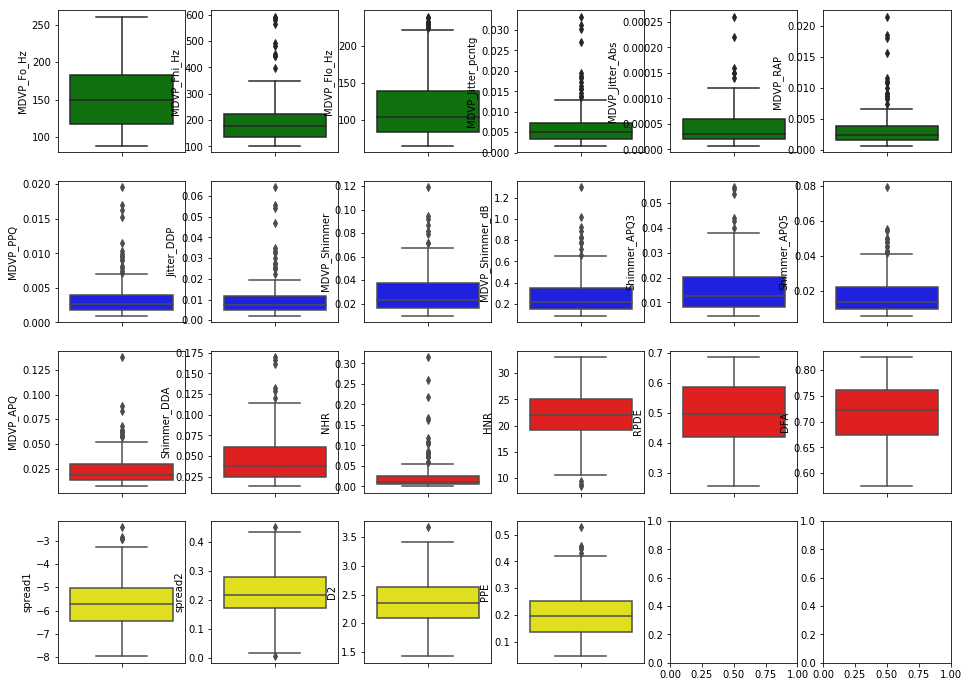

In [16]:
PD_Mtrx, axs = plt.subplots(ncols = 6,nrows = 4, figsize=(16, 12))
sns.boxplot(pd_df.MDVP_Fo_Hz, color = "green", orient = "v",ax=axs[0,0])
sns.boxplot(pd_df.MDVP_Fhi_Hz, color = "green", orient = "v",ax=axs[0,1])
sns.boxplot(pd_df.MDVP_Flo_Hz, color = "green", orient = "v",ax=axs[0,2])
sns.boxplot(pd_df.MDVP_Jitter_pcntg, color = "green", orient = "v",ax=axs[0,3])
sns.boxplot(pd_df.MDVP_Jitter_Abs, color = "green", orient = "v",ax=axs[0,4])
sns.boxplot(pd_df.MDVP_RAP, color = "green", orient = "v",ax=axs[0,5])
sns.boxplot(pd_df.MDVP_PPQ, color = "blue", orient = "v",ax=axs[1,0])
sns.boxplot(pd_df.Jitter_DDP, color = "blue", orient = "v",ax=axs[1,1])
sns.boxplot(pd_df.MDVP_Shimmer, color = "blue", orient = "v",ax=axs[1,2])
sns.boxplot(pd_df.MDVP_Shimmer_dB, color = "blue", orient = "v",ax=axs[1,3])
sns.boxplot(pd_df.Shimmer_APQ3, color = "blue", orient = "v",ax=axs[1,4])
sns.boxplot(pd_df.Shimmer_APQ5, color = "blue", orient = "v",ax=axs[1,5])
sns.boxplot(pd_df.MDVP_APQ, color = "red", orient = "v",ax=axs[2,0])
sns.boxplot(pd_df.Shimmer_DDA, color = "red", orient = "v",ax=axs[2,1])
sns.boxplot(pd_df.NHR, color = "red", orient = "v",ax=axs[2,2])
sns.boxplot(pd_df.HNR, color = "red", orient = "v",ax=axs[2,3])
sns.boxplot(pd_df.RPDE, color = "red", orient = "v",ax=axs[2,4])
sns.boxplot(pd_df.DFA, color = "red", orient = "v",ax=axs[2,5])
sns.boxplot(pd_df.spread1, color = "yellow", orient = "v",ax=axs[3,0])
sns.boxplot(pd_df.spread2, color = "yellow", orient = "v",ax=axs[3,1])
sns.boxplot(pd_df.D2, color = "yellow", orient = "v",ax=axs[3,2])
sns.boxplot(pd_df.PPE, color = "yellow", orient = "v",ax=axs[3,3])

In [17]:
# MDVP_Fhi_Hz,MDVP_jitter_pcntg, MDVP_jitter_ABS, MDVP_RAP,(2nd Row) of MDVP columns have very high outliers
# These outliers will have to be normalised before running the model

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


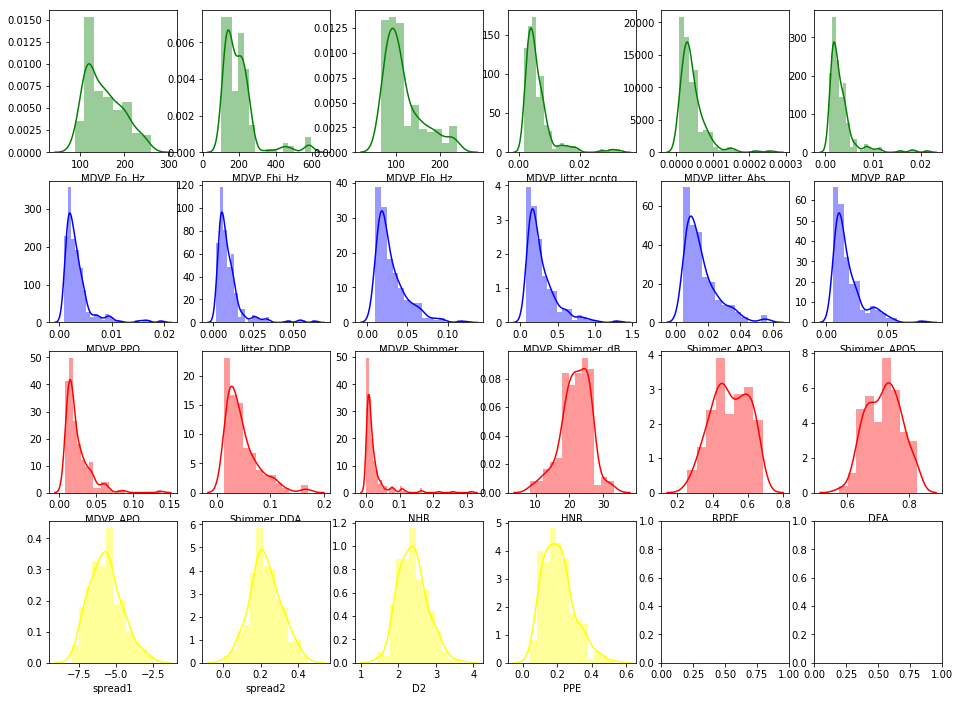

In [18]:
PD_Mtrx, axs = plt.subplots(ncols = 6,nrows = 4, figsize=(16, 12))
sns.distplot(pd_df.MDVP_Fo_Hz, color = "green",ax=axs[0,0])
sns.distplot(pd_df.MDVP_Fhi_Hz, color = "green",ax=axs[0,1])
sns.distplot(pd_df.MDVP_Flo_Hz, color = "green",ax=axs[0,2])
sns.distplot(pd_df.MDVP_Jitter_pcntg, color = "green", ax=axs[0,3])
sns.distplot(pd_df.MDVP_Jitter_Abs, color = "green", ax=axs[0,4])
sns.distplot(pd_df.MDVP_RAP, color = "green", ax=axs[0,5])
sns.distplot(pd_df.MDVP_PPQ, color = "blue", ax=axs[1,0])
sns.distplot(pd_df.Jitter_DDP, color = "blue", ax=axs[1,1])
sns.distplot(pd_df.MDVP_Shimmer, color = "blue", ax=axs[1,2])
sns.distplot(pd_df.MDVP_Shimmer_dB, color = "blue", ax=axs[1,3])
sns.distplot(pd_df.Shimmer_APQ3, color = "blue", ax=axs[1,4])
sns.distplot(pd_df.Shimmer_APQ5, color = "blue", ax=axs[1,5])
sns.distplot(pd_df.MDVP_APQ, color = "red", ax=axs[2,0])
sns.distplot(pd_df.Shimmer_DDA, color = "red", ax=axs[2,1])
sns.distplot(pd_df.NHR, color = "red", ax=axs[2,2])
sns.distplot(pd_df.HNR, color = "red", ax=axs[2,3])
sns.distplot(pd_df.RPDE, color = "red", ax=axs[2,4])
sns.distplot(pd_df.DFA, color = "red", ax=axs[2,5])
sns.distplot(pd_df.spread1, color = "yellow", ax=axs[3,0])
sns.distplot(pd_df.spread2, color = "yellow", ax=axs[3,1])
sns.distplot(pd_df.D2, color = "yellow", ax=axs[3,2])
sns.distplot(pd_df.PPE, color = "yellow", ax=axs[3,3])

In [19]:
# Distribution plot shows that spread1, spread2, D2, PPE seems normally distributed
# HNR, RPDF, DFA : doesnt show normal distribution

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


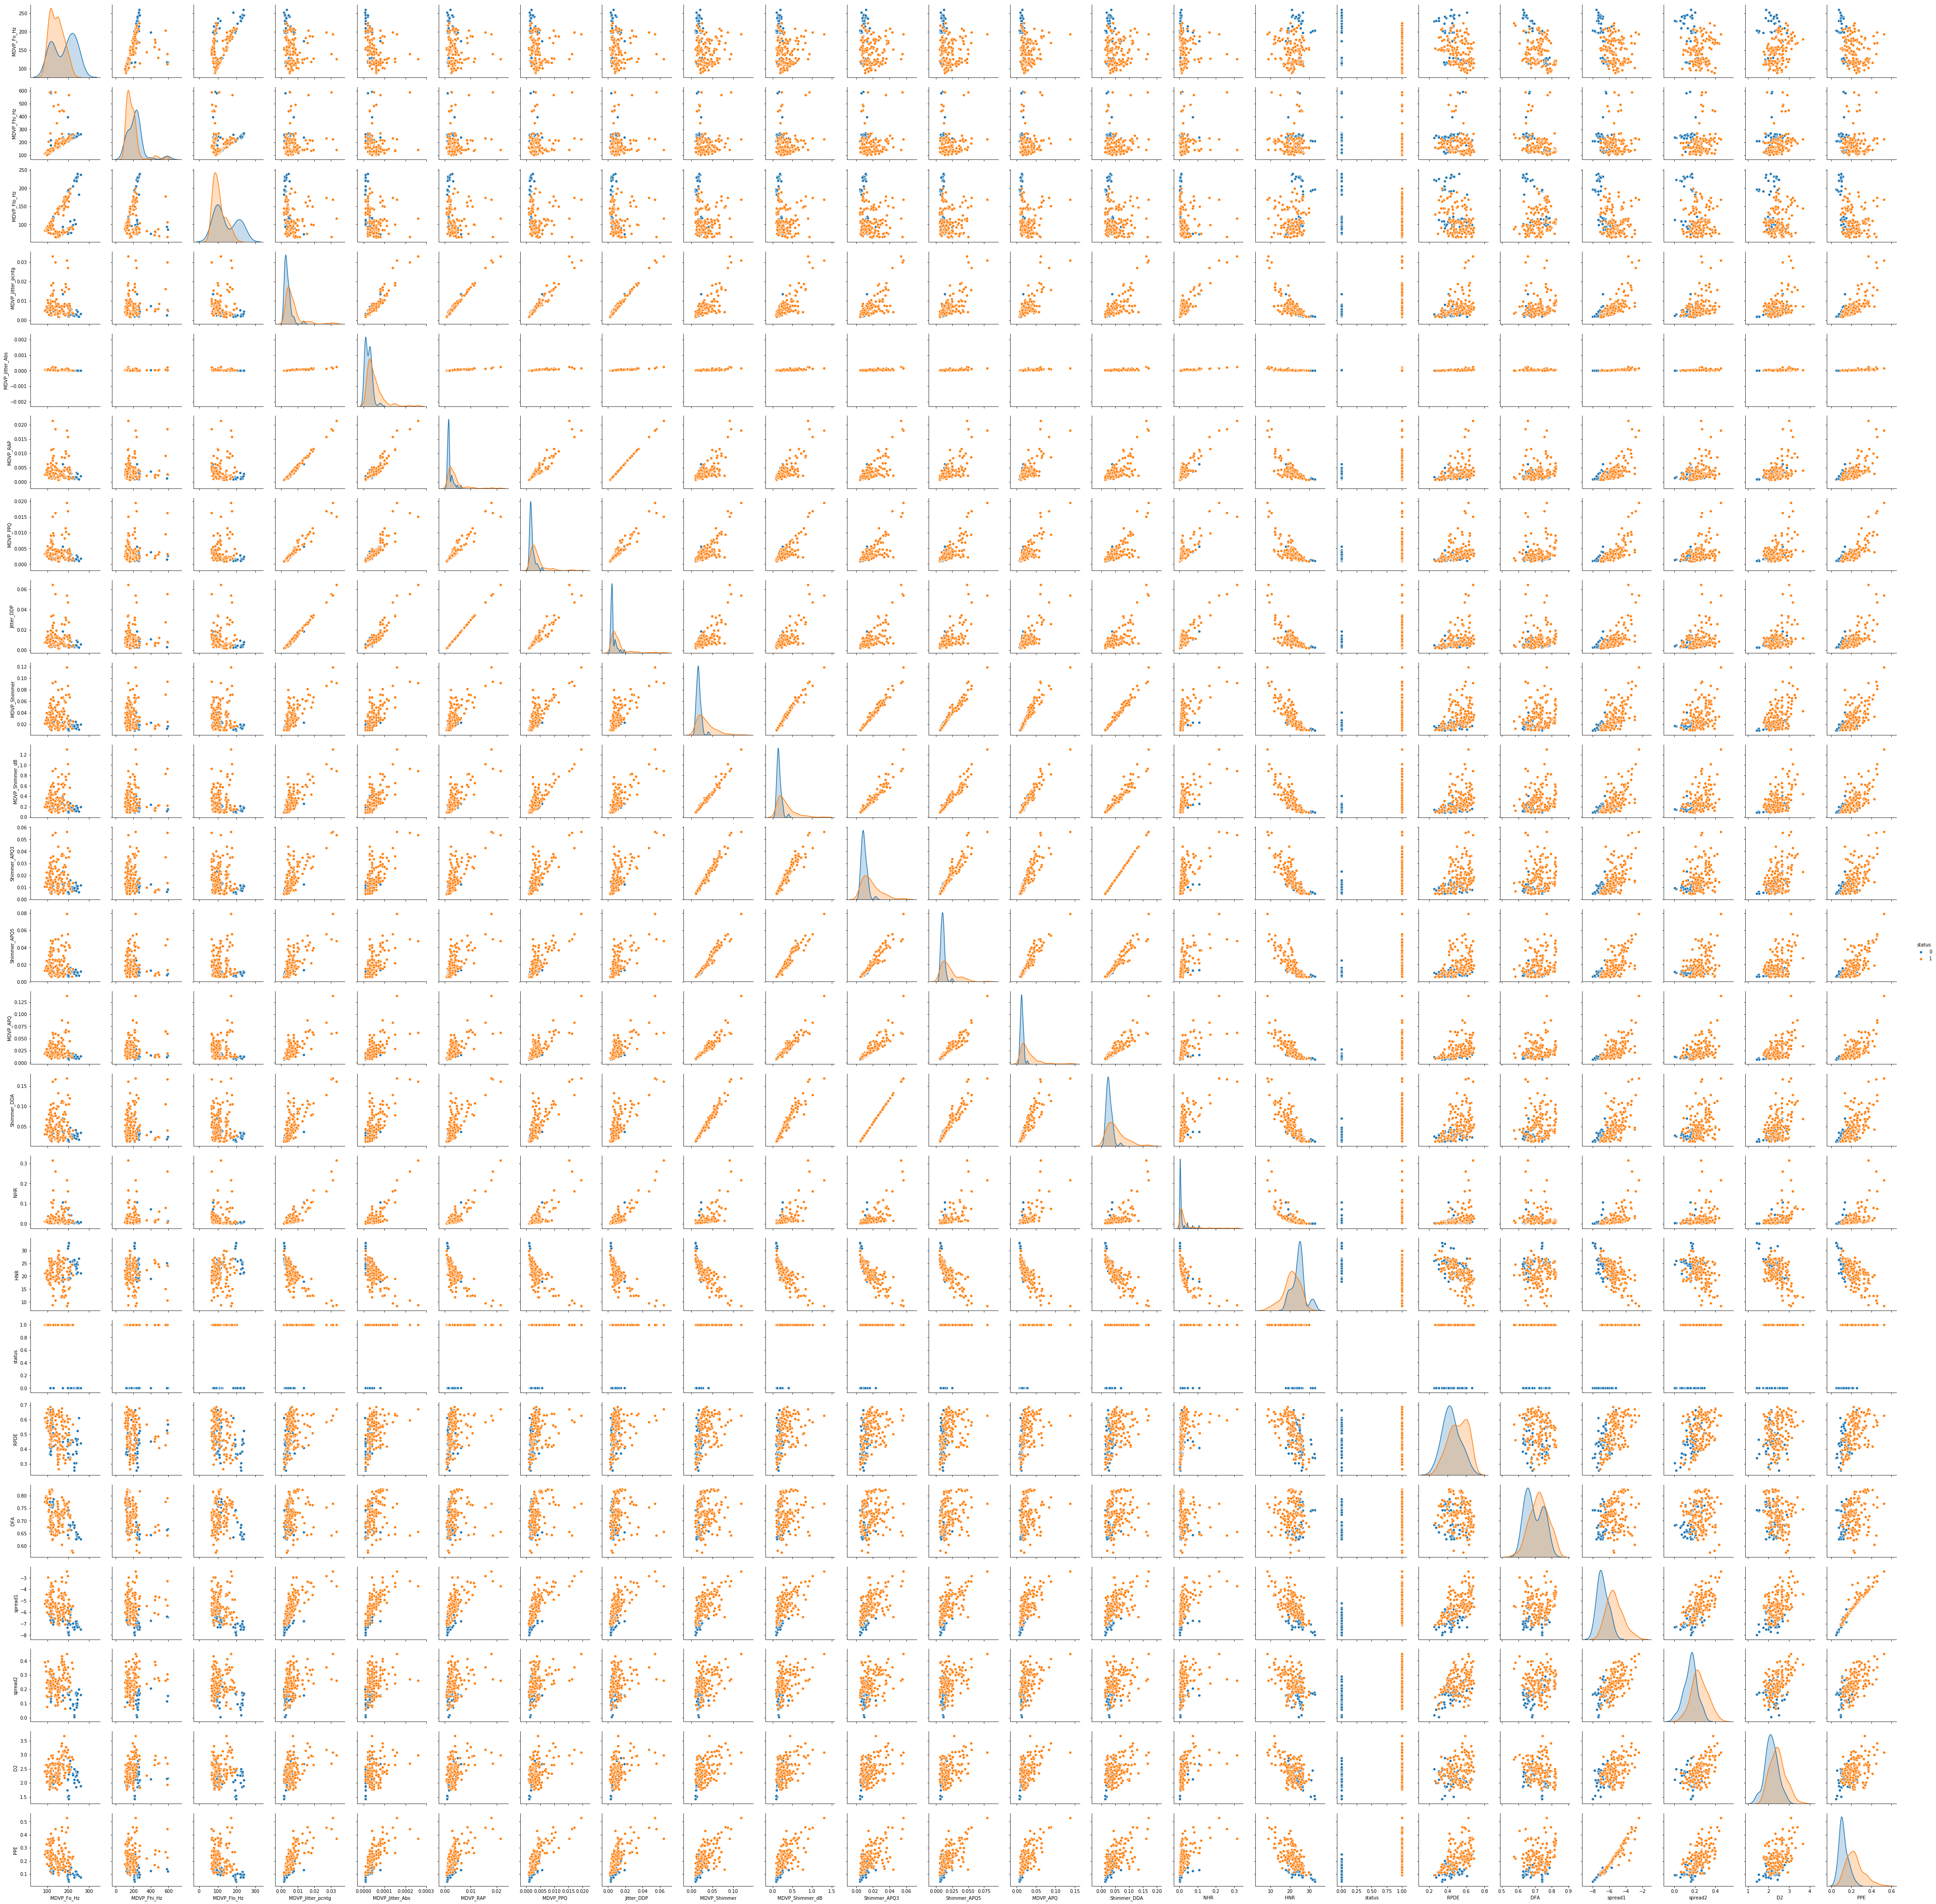

In [20]:
sns.pairplot(pd_df, diag_kind='kde', hue = "status");

In [21]:
pd_df.corr().T

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_pcntg,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP_Fo_Hz,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP_Fhi_Hz,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP_Flo_Hz,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP_Jitter_pcntg,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP_Jitter_Abs,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP_RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP_PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter_DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP_Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP_Shimmer_dB,-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [22]:
# Average Vocal Freq shows a positive correlation to HI and Low Average Vocal Freq.
# All MDVP jitter percentage has very high correlation with almost all other variables. So it will be the key variable
# defined in the model equation

### 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [23]:
# Convert the column to Category column 
# pd_df["col_name"] = pd_df["col_name"].astype('category')
# Add a column "class_cat" as Category code
# pd_df["name_cat"] = pd_df["col_name"].cat.codes

In [24]:
# Removing the name columns with the assumption that the values are relevant if prediction is done basis patient data
# for that data may need to be denormalised, which we are not doing in this case and predicting basis readings of the
# various tests carried out
pd_df_m = pd_df.drop(["col_name","name"] , axis=1)

In [25]:
pd_df_m.head(2)

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_pcntg,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [26]:
X = pd_df_m.drop("status" , axis=1)
y = pd_df_m.pop("status")

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=7)

### 5.Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy' )

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 6.Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [29]:
model.score(X_test, y_test)

0.9152542372881356

In [30]:
predicted_dt = model.predict(X_test)

In [31]:
metrics.confusion_matrix(y_test, predicted_dt)

array([[11,  1],
       [ 4, 43]])

In [32]:
from sklearn.metrics import roc_curve, auc
y_predictProb = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9157801418439716

### 7.Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

In [33]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 9, min_samples_split = 3 )

In [34]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
model1.score(X_test, y_test)

0.864406779661017

In [36]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, min_samples_split = 5 )

In [37]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
model2.score(X_test, y_test)

0.864406779661017

In [39]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7, min_samples_split = 5 )

In [40]:
model3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
model3.score(X_test, y_test)

0.8983050847457628

In [42]:
### High max depth helps improve the accuracy marginally
### Increasing the min Sample split is degrading the performance of the model, but used with sample depth shows
### good results
### While it may sound optimimu to increase depth, I presume it is also resulting in overfitting

### 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [43]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100)
model_rf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
model_rf.score(X_test,y_test)

0.8813559322033898

In [45]:
predicted_rf = model_rf.predict(X_test)

In [46]:
metrics.confusion_matrix(y_test, predicted_rf)

array([[ 8,  4],
       [ 3, 44]])

In [47]:
y_predictProb = model_rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9361702127659574

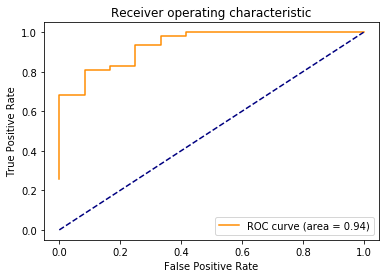

In [48]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [49]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08333333, 0.08333333,
       0.16666667, 0.16666667, 0.25      , 0.25      , 0.25      ,
       0.25      , 0.33333333, 0.33333333, 0.41666667, 0.41666667,
       1.        ])

In [50]:
thresholds[11]

0.77

In [51]:
THRESHOLD = 0.7
preds = np.where(model_rf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.881356
recall,0.914894
precision,0.934783


In [52]:
## In this case there is observed high frequency of recall
## Changing number of trees is not changing accuracy to a large extent